Importing the Dependencies

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

Import the data from a csv file into a pandas dataframe

In [51]:
cars = pd.read_csv('https://raw.githubusercontent.com/avinashjairam/Car-Price-Prediction/main/car%20data.csv')

In [52]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [53]:
cars['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

Take a peek at our dataset

In [54]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


We will now generate correlation matrix

<ipython-input-55-c80c48236cd3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(cars.corr())


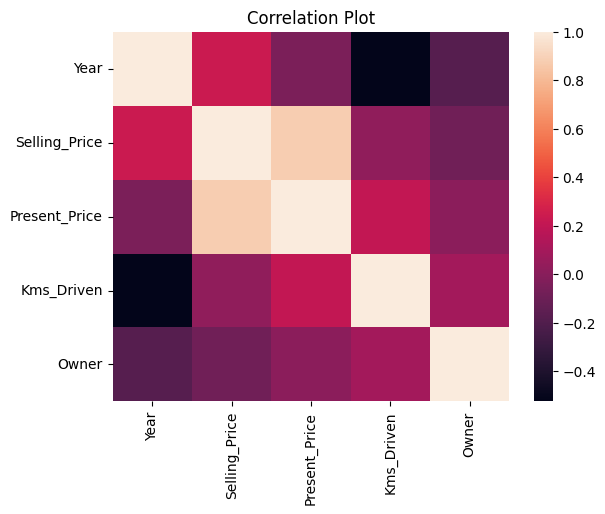

In [55]:
sns.heatmap(cars.corr())
plt.title('Correlation Plot')
plt.show()

What features do we have in our dataset?

In [56]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

How much data do we have?

In [57]:
cars.shape

(301, 9)

What data types do we have?

In [58]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Do we have any missing values?

In [59]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

How does the fuel type vary?

In [60]:
cars.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

If you have space in the column names - try this:

In [61]:
cars['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

How does the seller type vary?

In [62]:
cars.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

How does the transmission type vary?

In [63]:
print(cars.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


Visualize the distribution of the Seller Types

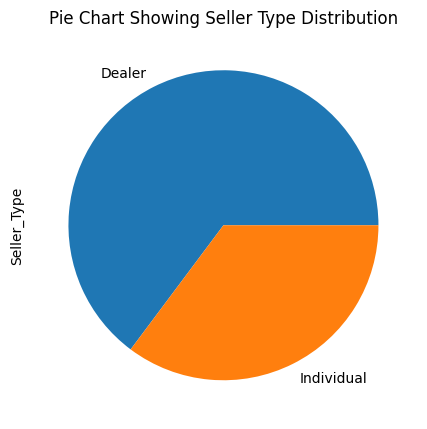

In [64]:
data = cars.Seller_Type.value_counts()
plt.figure(figsize= (5, 10))
data.plot.pie(title='Pie Chart Showing Seller Type Distribution')
plt.show()

Visualize the distribution of the transmissions

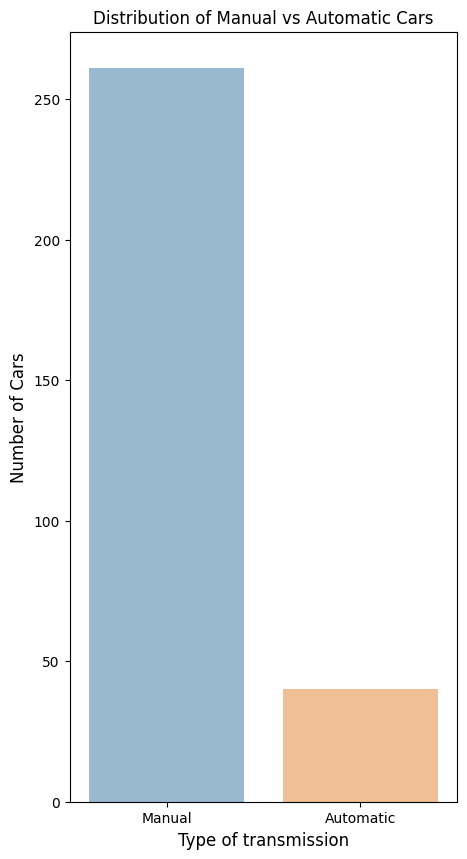

In [65]:
transmission_count = cars.Transmission.value_counts()
plt.figure(figsize=(5,10))
sns.barplot(x= transmission_count.index, y = transmission_count.values, alpha= 0.5)
plt.title('Distribution of Manual vs Automatic Cars')
plt.ylabel('Number of Cars', fontsize = 12)
plt.xlabel('Type of transmission', fontsize = 12)
plt.show()

Visualizing the fuel type distribution

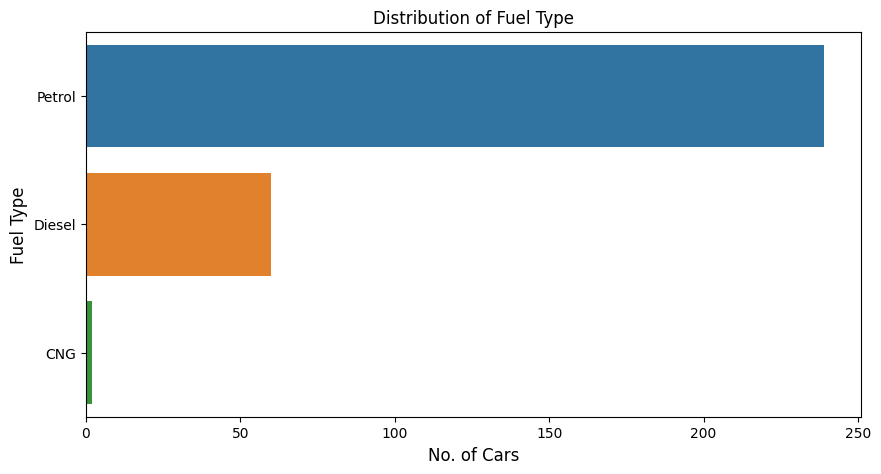

In [66]:
fuel_type_count = cars.Fuel_Type.value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x = fuel_type_count.values, y = fuel_type_count.index, alpha = 1, orient='h')
plt.title('Distribution of Fuel Type')
plt.ylabel('Fuel Type', fontsize=12)
plt.xlabel('No. of Cars', fontsize=12)
plt.show()



Let's take another look at the dataset. We need to do one hot encoding for the categorical columns - Fuel Type, Seller Type, Transmission

In [67]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Fuel Type

In [68]:
fuel_type_encoding = pd.get_dummies(cars['Fuel_Type'])

the encoded fuel types

In [69]:
fuel_type_encoding

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


Now we can drop the original Fuel Type Column now that we have done the encoding

In [70]:
cars = cars.drop('Fuel_Type', axis=1)

In [71]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Dealer,Manual,0


Join the encoded fuel type column to the original dataframe. Note - this can also be done using concat()

In [72]:
cars = cars.join(fuel_type_encoding)

In [73]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Dealer,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Dealer,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Dealer,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Dealer,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Dealer,Manual,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Dealer,Manual,0,0,1,0
297,brio,2015,4.00,5.90,60000,Dealer,Manual,0,0,0,1
298,city,2009,3.35,11.00,87934,Dealer,Manual,0,0,0,1
299,city,2017,11.50,12.50,9000,Dealer,Manual,0,0,1,0


We need to do the same for Seller Type and Transmission

In [74]:
seller_type_encoding = pd.get_dummies(cars['Seller_Type'], drop_first=True)

In [75]:
cars = cars.drop('Seller_Type', axis =1)

cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Petrol
0,ritz,2014,3.35,5.59,27000,Manual,0,0,0,1
1,sx4,2013,4.75,9.54,43000,Manual,0,0,1,0
2,ciaz,2017,7.25,9.85,6900,Manual,0,0,0,1
3,wagon r,2011,2.85,4.15,5200,Manual,0,0,0,1
4,swift,2014,4.60,6.87,42450,Manual,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Manual,0,0,1,0
297,brio,2015,4.00,5.90,60000,Manual,0,0,0,1
298,city,2009,3.35,11.00,87934,Manual,0,0,0,1
299,city,2017,11.50,12.50,9000,Manual,0,0,1,0


In [76]:
cars = cars.join(seller_type_encoding)
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Transmission,Owner,CNG,Diesel,Petrol,Individual
0,ritz,2014,3.35,5.59,27000,Manual,0,0,0,1,0
1,sx4,2013,4.75,9.54,43000,Manual,0,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,Manual,0,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,Manual,0,0,0,1,0
4,swift,2014,4.60,6.87,42450,Manual,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Manual,0,0,1,0,0
297,brio,2015,4.00,5.90,60000,Manual,0,0,0,1,0
298,city,2009,3.35,11.00,87934,Manual,0,0,0,1,0
299,city,2017,11.50,12.50,9000,Manual,0,0,1,0,0


In [77]:
transmission_encoding = pd.get_dummies(cars['Transmission'], drop_first=True)
cars = cars.join(transmission_encoding)

In [78]:
cars = cars.drop('Transmission', axis=1)



We have now completed our encoding

In [79]:
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Individual,Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1,0,1
299,city,2017,11.50,12.50,9000,0,0,1,0,0,1


We will now separate our data into features (X) and targets (y)

We will not consider Car_Name and the Selling_Price.

In [80]:
X = cars.drop(['Car_Name', 'Selling_Price'], axis = 1)
y = cars['Selling_Price']

In [81]:
X['Year'].value_counts()

2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

Take a look at our feature set

In [82]:
X

,Year,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Individual,Manual
0,2014,5.59,27000,0,0,0,1,0,1
1,2013,9.54,43000,0,0,1,0,0,1
2,2017,9.85,6900,0,0,0,1,0,1
3,2011,4.15,5200,0,0,0,1,0,1
4,2014,6.87,42450,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,0,1,0,0,1
297,2015,5.90,60000,0,0,0,1,0,1
298,2009,11.00,87934,0,0,0,1,0,1
299,2017,12.50,9000,0,0,1,0,0,1


Take a look at our labels

In [83]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

Splitting the dataset into training and tests sets in the ratio 70/30

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2)

Create the model and fit (train) on the training data

In [85]:
from sklearn.linear_model import LinearRegression

#Load the linear regression model
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

Make Predictions on the test data

In [86]:
#model evaluation
#let's test our model on our test data
y_pred = LR.predict(X_test)

Calculating the Coefficients

In [87]:
coefficients = LR.coef_
print(f'Coefficients {coefficients}')

Coefficients [ 4.02481200e-01  4.19354923e-01 -5.79253120e-06 -9.04856428e-01
 -1.28100017e+00  1.84046015e+00 -5.59459982e-01 -1.09180451e+00
 -1.67473309e+00]


Calculate the Intercept

In [88]:
intercept = LR.intercept_
print(f'Intercept {intercept}')

Intercept -806.7227665009518


Calculating R-Squared

In [89]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

R2: 0.8242672907442306


Calculating the MSE

In [90]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 2.5354633547382313


Calculating RMSE

In [91]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

RMSE: 1.592313836760276


Calculating the MAE

In [92]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE {mae}')

MAE 1.1971541777669974


In [93]:
y_pred

array([10.71621521,  0.76153173,  4.24331532,  5.44491544,  9.84492724,
        4.2139907 ,  2.66738563,  7.85958598,  0.22134524,  5.12527913,
        6.12714594,  6.69395023,  2.33111234,  7.60107216,  1.96030172,
        1.74882609,  2.05693732,  1.88699297,  9.75191345,  4.24308256,
        1.51427687,  9.54613688,  1.4986914 ,  9.64496202,  0.87106486,
        8.53481881,  1.57296849, -3.14316989,  4.23047535,  2.14293545,
        3.62125036,  3.73657643,  5.53376407,  7.61972411, -1.82610866,
        7.29571847,  8.67442404,  5.76533649,  6.07633385,  6.76580158,
       16.27500729,  2.10327757,  1.0962102 , -0.39252409,  7.30415679,
        6.7026634 ,  1.02919782,  7.31888859, 14.1667026 ,  3.03866392,
        8.50006363, -0.81956319,  8.7812273 ,  1.19045945,  2.14667326,
       -0.76347834,  0.73740225,  9.93739305, -0.3997044 , -2.33277392,
       10.45014953,  6.70185245,  0.99471407,  4.34493155,  0.08326884,
        3.68624792,  2.82885951,  1.46883268,  0.46375649,  1.64

Export the model as pickle

In [94]:
import pickle

with open('car_price_prediction_model.pkl', 'wb') as f:
  pickle.dump(LR, f)